In [2]:
import os
from pathlib import Path
import pandas as pd
from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from dotenv import load_dotenv

In [3]:
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
load_dotenv("/Users/connor/Documents/env/news_api.env")

True

In [5]:
newsapi = NewsApiClient(api_key=os.environ["news_api"])

In [6]:
btc_news = newsapi.get_everything(q="bitcoin", language='en')

In [7]:
eth_news = newsapi.get_everything(q="ethereum", language='en')

In [8]:
btc_sent = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sent.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        
        })
        
    except AttributeError:
        pass

btc_df = pd.DataFrame(btc_sent)

cols = ["compound", "negative", "positive", "text"]
btc_df = btc_df[cols]

btc_df.head()

,compound,negative,positive,text
0,0.0258,0.059,0.061,Just hackers burning up 0day like it’s a fire ...
1,-0.4767,0.094,0.000,"Authorities in Tampa, Florida have arrested a ..."
2,-0.4019,0.074,0.000,"On July 15, a Discord user with the handle Kir..."
3,0.0772,0.000,0.038,Reuters had previously reported the FBI would ...
4,0.0000,0.000,0.000,Most of these accounts tweeted some variant of...


In [9]:
eth_sent = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sent.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        
        })
        
    except AttributeError:
        pass

eth_df = pd.DataFrame(eth_sent)

cols = ["compound", "negative", "positive", "text"]
eth_df = eth_df[cols]

eth_df.head()

,compound,negative,positive,text
0,0.5719,0.000,0.132,According to a public letter from the U.S. Com...
1,0.2263,0.000,0.053,"When the inventor of AWS Lambda, Tim Wagner, a..."
2,-0.6808,0.177,0.000,Enlarge/ A screenshot from Wozniak's lawsuit s...
3,0.0000,0.000,0.000,Crypto has been on a tear in the last week.\r\...
4,-0.4215,0.083,0.000,"<ul><li>Bitcoin crossed the $11,000 level and ..."


In [10]:
btc_df.describe()

,compound,negative,positive
count,20.000000,20.000000,20.000000
mean,-0.146240,0.080350,0.055200
std,0.480613,0.084312,0.053146
min,-0.880400,0.000000,0.000000
25%,-0.507375,0.000000,0.000000
50%,-0.102350,0.066500,0.049000
75%,0.140475,0.109000,0.074250
max,0.636900,0.277000,0.184000


In [11]:
eth_df.describe()

,compound,negative,positive
count,17.000000,17.000000,17.000000
mean,0.112047,0.059235,0.081353
std,0.487916,0.058487,0.079717
min,-0.680800,0.000000,0.000000
25%,-0.340000,0.000000,0.000000
50%,0.318200,0.058000,0.069000
75%,0.507000,0.102000,0.132000
max,0.726900,0.177000,0.226000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
lemmatizer = WordNetLemmatizer()
sw = set(stopwords.words('english'))

In [20]:
def tokenizer(text):
    """Tokenizes text."""

    regex = re.compile("[^a-zA-Z]")
    re_clean = regex.sub(' ', text)
    words = word_tokenize(re_clean)
    btc_result = [word.lower() for word in btc_news if word.lower() not in sw]
    eth_result = [word.lower() for word in eth_news if word.lower() not in sw]
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens


In [21]:
btc_df['tokens'] = btc_df['text'].apply(lambda x:tokenizer(x))

In [22]:
eth_df['tokens'] = eth_df['text'].apply(lambda x:tokenizer(x))

---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [23]:
from collections import Counter
from nltk import ngrams

In [24]:
btc_df.head()

,compound,negative,positive,text,tokens
0,0.0258,0.059,0.061,Just hackers burning up 0day like it’s a fire ...,"[hacker, burning, day, like, fire, sale, imagi..."
1,-0.4767,0.094,0.000,"Authorities in Tampa, Florida have arrested a ...","[authorities, tampa, florida, arrested, year, ..."
2,-0.4019,0.074,0.000,"On July 15, a Discord user with the handle Kir...","[july, discord, user, handle, kirk, made, enti..."
3,0.0772,0.000,0.038,Reuters had previously reported the FBI would ...,"[reuters, previously, reported, fbi, would, la..."
4,0.0000,0.000,0.000,Most of these accounts tweeted some variant of...,"[account, tweeted, variant, message, someone, ..."


In [25]:
def word_counter(btc_df):
    big_string_btc = ' '.join(btc_df)
    processed = tokenizer(big_string_btc)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(processed).most_common(10))
    
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [26]:
word_counter(btc_df)

,word,count
0,compound,1
1,negative,1
2,positive,1
3,text,1
4,token,1


In [34]:
def word_counter(eth_df):
    big_string_eth = ' '.join(eth_df)
    processed = tokenizer(big_string_eth)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])
    

In [35]:
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [36]:
word_counter(btc_df)

,word,count
0,compoundnegativepositivetexttokens,1


In [37]:
word_counter(eth_df)

,word,count
0,compoundnegativepositivetexttokens,1


# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

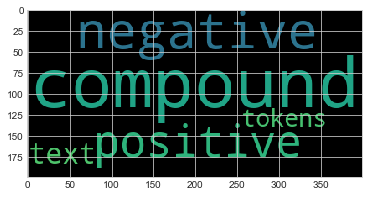

In [41]:
wc = WordCloud().generate(' '.join(btc_df))
plt.imshow(wc)

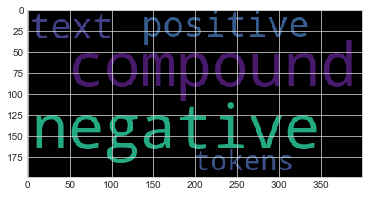

In [42]:
wc = WordCloud().generate(' '.join(eth_df))
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [ ]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [31]:
# Concatenate all of the bitcoin text togethe
btc_df['text'] = pd.Series
btc_doc = nlp(btc_df['text'])
display.render(btc_doc, style="ent")

TypeError: Argument 'string' has incorrect type (expected str, got Series)

In [ ]:
# Run the NER processor on all of the text

# Add a title to the document

In [ ]:
# Render the visualization

In [ ]:
# List all Entities

---

## Ethereum NER

In [ ]:
# Concatenate all of the bitcoin text together

In [ ]:
# Run the NER processor on all of the text

# Add a title to the document

In [ ]:
# Render the visualization

In [ ]:
# List all Entities